The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [2]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the data set
nobel_df = pd.read_csv("data/nobel.csv")

### What is the most commonly awarded gender and birth country?




In [3]:
# find the most common gender
top_gender = nobel_df["sex"].value_counts().index[0]

# find the most common gender
top_country = nobel_df["birth_country"].value_counts().index[0]

### What decade had the highest proportion of US-born winners?

C:\Users\ASUS TUF\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


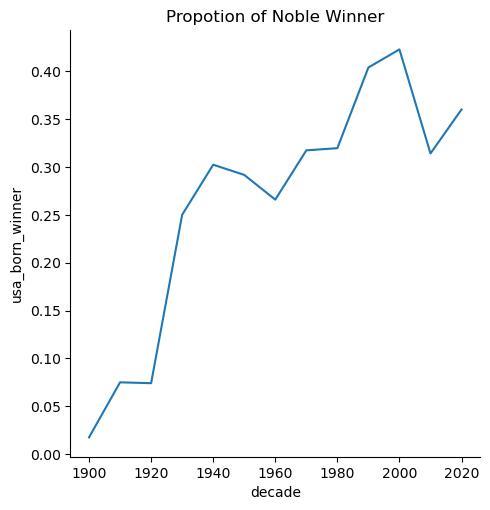

In [4]:
# Create new column bool "usa_born_winner"
nobel_df["usa_born_winner"] = nobel_df["birth_country"] == "United States of America"

# Create new column "decade"
nobel_df["decade"] = (np.floor(nobel_df["year"]/ 10) * 10).astype(int)

# Take the highest proportion base on "decade"
nobel_by_decade_usa = nobel_df.groupby("decade", as_index=False)["usa_born_winner"].mean()

# Take the highest decade from nobel_by_decade_usa
max_decade_usa = nobel_by_decade_usa[nobel_by_decade_usa["usa_born_winner"] == nobel_by_decade_usa["usa_born_winner"].max()]['decade'].values[0]

# Create a Line Plot to visualize the propotion of Noble USA Born base on decade
sns.relplot(
    data=nobel_by_decade_usa,
    kind="line",
    x="decade",
    y="usa_born_winner"
)
plt.title("Propotion of Noble Winner")
plt.show()

### What decade and category pair had the highest proportion of female laureates?

In [5]:
# Create new column bool "female_winner"
nobel_df["female_winner"] = nobel_df["sex"] == "Female"

# Groupby Decade and Category for show the propotion
female_dec_cat = nobel_df.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

max_female_dec_cat = female_dec_cat[female_dec_cat["female_winner"] == female_dec_cat['female_winner'].max()][['decade', 'category']]
max_deca_female = max_female_dec_cat["decade"].values[0]
max_cat_female =max_female_dec_cat["category"].values[0]

max_female_dict = {
    max_deca_female : max_cat_female
}

### What decade and category pair had the highest proportion of female laureates?

In [6]:
# Subset the DataFrame, only take Female Winner's
female_winner = nobel_df[nobel_df["female_winner"]]
min_row = female_winner[female_winner['year'] == female_winner['year'].min()]
first_woman_name = female_winner["full_name"].values[0]
first_woman_category = female_winner["category"].values[0]

### Noble who win multiple times

In [7]:
# Get list Full Name of Noble who wins multiple time 
counts = nobel_df['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)